# Tarea 1: Estadística, Física experimental II
- El notebook estará dividido en dos partes, la primera para el diámetro de las canicas y todos los puntos relacionados; la segunda para el conteo del detector Geiger y todos los puntos relacionados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson

# Diámetro de canicas

In [10]:
# data = pd.read_excel('D:/Estiven/Datos/Proyectos/fisica_experimental/estiven/data/raw/tarea_1_datos_geiger_canicas.xlsx', sheet_name='diametro_canicas')
data_canicas_json = '{"diametro(mm)":{"0":15.82,"1":15.7,"2":16.31,"3":16.37,"4":15.19,"5":15.77,"6":16.05,"7":15.59,"8":15.61,"9":15.47,"10":15.82,"11":15.43,"12":16.51,"13":15.67,"14":15.64}}'
data_canicas = pd.read_json(data_canicas_json).sort_index()
data_canicas.head()

,diametro(mm)
0,15.82
1,15.70
2,16.31
3,16.37
4,15.19


1. Graficar el conjunto de medidas de diámetros de canicas que su grupo tomó (un histograma) y analizar la distribución de los datos. ¿Tiene la forma de una distribución Gaussiana? ¿Son suficientes datos para dar alguna conclusión? Reporte las variables de tendencia central (x̄, s).

(array([1., 1., 1., 5., 3., 0., 1., 0., 2., 1.]),
 array([15.19 , 15.322, 15.454, 15.586, 15.718, 15.85 , 15.982, 16.114,
        16.246, 16.378, 16.51 ]),
 <BarContainer object of 10 artists>)

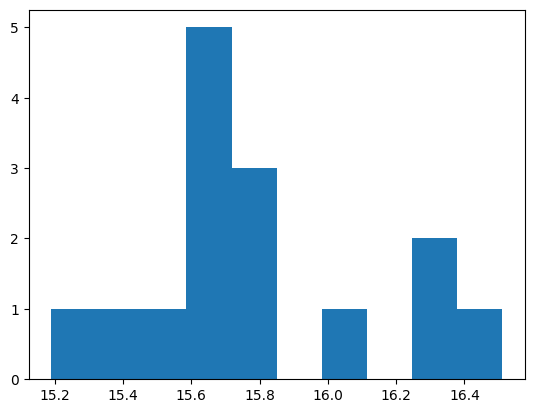

In [21]:
plt.hist(data_canicas, bins=10)

# Detector Geiger

In [9]:
# data = pd.read_excel('D:/Estiven/Datos/Proyectos/fisica_experimental/estiven/data/raw/tarea_1_datos_geiger_canicas.xlsx', sheet_name='contador_geiger')
data_geiger_json = '{"conteo_particulas":{"0":4,"1":3,"2":6,"3":1,"4":4,"5":4,"6":2,"7":4,"8":3,"9":2,"10":4,"11":2,"12":3,"13":2,"14":1,"15":2,"16":3,"17":5,"18":2,"19":4,"20":3,"21":3,"22":4,"23":4,"24":4,"25":3,"26":3,"27":1,"28":7,"29":1,"30":2,"31":4,"32":3,"33":3,"34":6,"35":4,"36":1,"37":4,"38":4,"39":2,"40":2,"41":2,"42":4,"43":5,"44":3,"45":2,"46":4,"47":1,"48":3,"49":6,"50":4,"51":7,"52":6,"53":3,"54":3,"55":3,"56":2,"57":1,"58":1,"59":1,"60":9,"61":2,"62":3,"63":3,"64":6,"65":2,"66":3,"67":1,"68":5,"69":0,"70":0,"71":3,"72":2,"73":3,"74":0,"75":0,"76":2,"77":3,"78":2,"79":3,"80":1,"81":4,"82":0,"83":3,"84":4,"85":0,"86":4,"87":2,"88":1,"89":2,"90":1,"91":5,"92":1,"93":3,"94":2,"95":3,"96":1,"97":4,"98":1,"99":5}}'
data_geiger = pd.read_json(data_geiger_json).sort_index()
data_geiger

,conteo_particulas
0,4
1,3
2,6
3,1
4,4
...,...
95,3
96,1
97,4
98,1


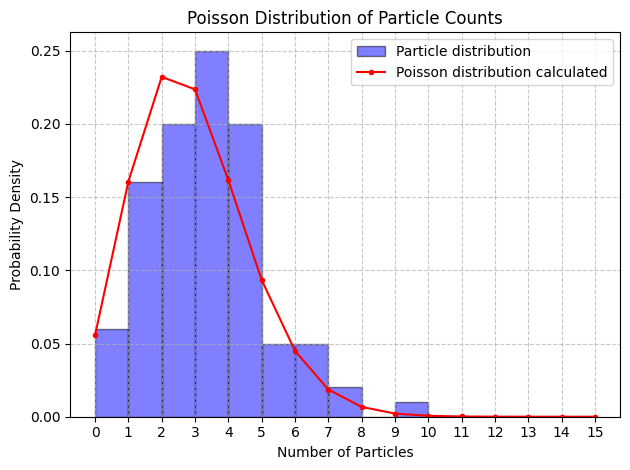

In [8]:
# Histogram plot
hist, bins, _ = plt.hist(data_geiger['conteo_particulas'], 
                         bins=range(0, 16), 
                         density=True,
                         alpha=0.5, 
                         color='blue', 
                         edgecolor='black', 
                         label='Particle distribution')

# Calculating Poisson distribution values
poisson_values = poisson.pmf(bins, mu=data_geiger['conteo_particulas'].mean())

# Plot Poisson distribution as a line
plt.plot(bins, 
         poisson_values, 
         marker='.', 
         linestyle='-', 
         color='red', 
         label='Poisson distribution calculated')

# Add labels and title
plt.xlabel('Number of Particles')
plt.ylabel('Probability Density')
plt.title('Poisson Distribution of Particle Counts')
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to display all numbers
plt.xticks(np.arange(0, 16))

# Display the plot
plt.tight_layout()
plt.show()